In [9]:
# Basic libraries
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
count_vector = CountVectorizer(stop_words="english",tokenizer=lambda x: x.split(','))
def remwithre(text, there=re.compile(re.escape(':')+'.*')):
  return there.sub('', text)

steam_df = pd.read_csv('./steam_games.csv',delimiter=';', low_memory=False).astype('unicode')
df = steam_df
for x in range(len(df.index)):
    df['Tags'][x] = re.sub(r':.+?,', ',',steam_df['Tags'][x])
    df['Tags'][x] = remwithre(df['Tags'][x])
df.drop(['Short Description','Type','Owners','Price','Discount','CCU','Languages','Platforms','Release Date','Required Age','Website','Header Image'], axis=1, inplace=True)
app_id_df = df['App ID']
df.sort_values(by=['Tags'])
# split the Name column into two columns
tags_df = df['Tags'].str.split(',', expand=True)
tags_df = pd.merge(app_id_df,tags_df,left_index=True,right_index=True)
count_vector.fit(steam_df['Tags'])
doc_array = count_vector.transform(steam_df['Tags']).toarray()
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names_out())
df = pd.merge(df,tags_df,on='App ID')
just_tags_df = tags_df.loc[:, tags_df.columns != 'App ID']

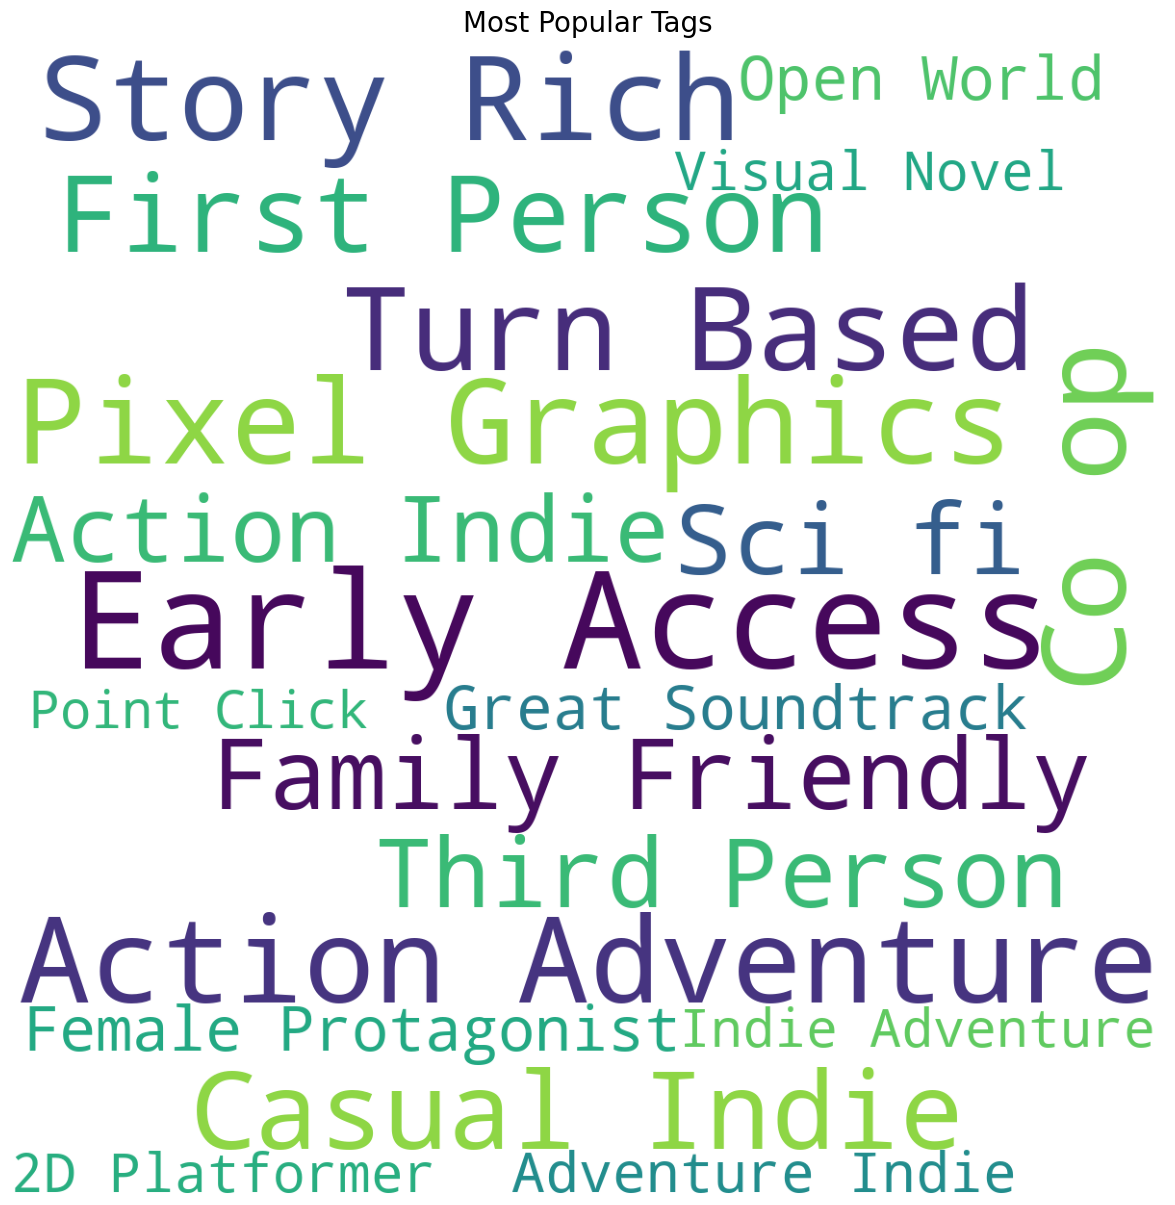

In [45]:
just_tags_df = just_tags_df.fillna(value='')
all_elements = just_tags_df.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan' or str(x) != None]
temp_df = pd.DataFrame({'col':cleanedList})
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20, regexp = r"\w[\w]+").generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Tags',fontsize = 20)
plt.show()


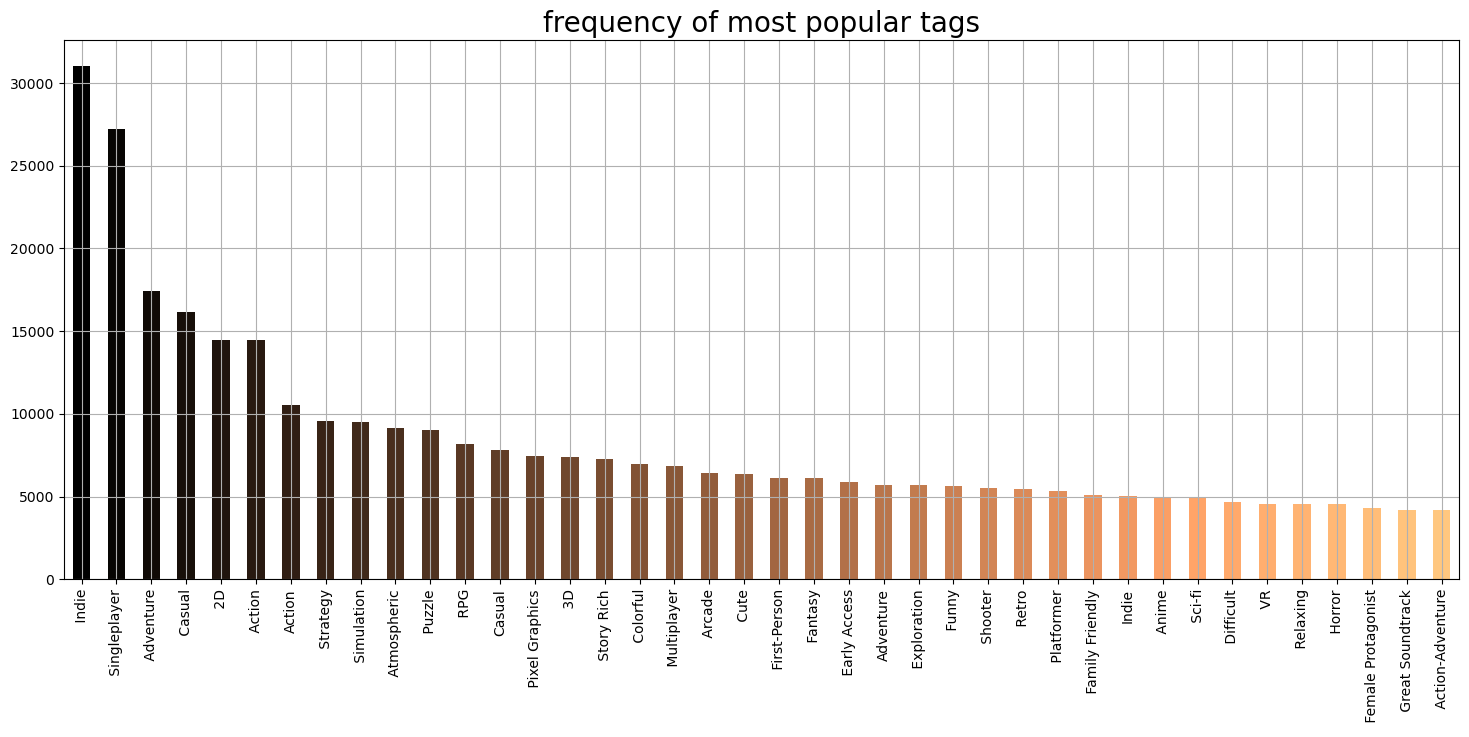

In [46]:
# looking at the frequency of most popular tags 

just_tags_df = tags_df.loc[:, tags_df.columns != 'App ID']
all_elements = just_tags_df.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan' or str(x) != None]
temp_df = pd.DataFrame({'col':cleanedList})
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular tags', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

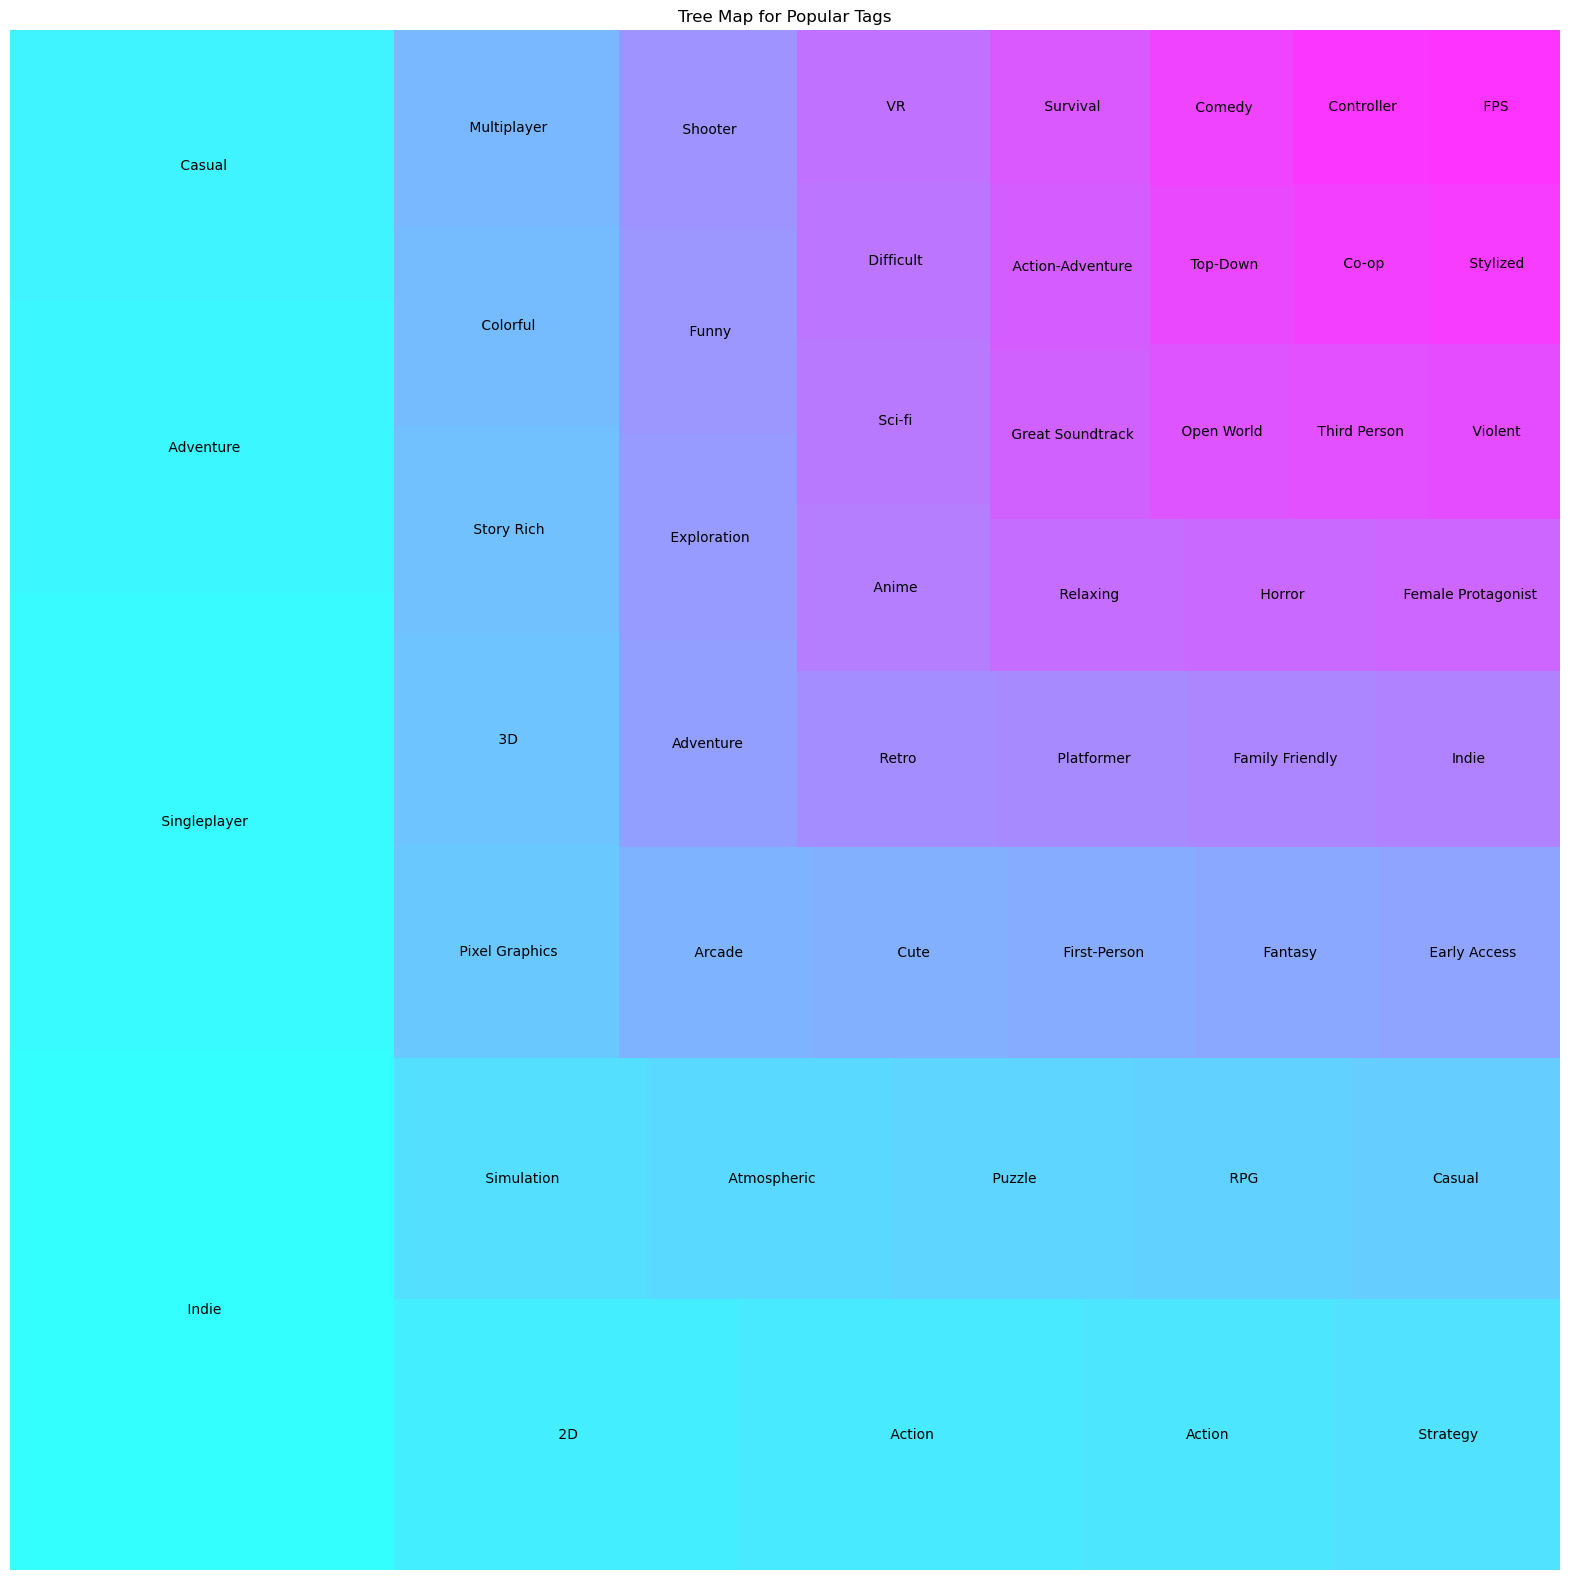

In [48]:

import squarify
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Tags')
plt.axis('off')
plt.show()

In [10]:
just_tags_df = tags_df.loc[:, tags_df.columns != 'App ID']
just_tags_df = just_tags_df.fillna(value='-1')

# making each customers shopping items an identical list
trans = []
for i in range(0, 55691):
    trans.append([str(just_tags_df.values[i,j]) for j in range(0, 21)])

# conveting it into a numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

print(trans)

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape
data= data.loc[:, data.columns != '-1']
data

(55691, 21)
[['Action' ' FPS' ' Multiplayer' ... ' Assassin' ' Nostalgia' '-1']
 ['"Shoot Em Up"' ' Metroidvania' ' Bullet Hell' ... ' GameMaker'
  ' Great Soundtrack' '-1']
 ['Rogue-like' ' Turn-Based Combat' ' RPG' ... ' Top-Down' ' Magic' '-1']
 ...
 ['Animation & Modeling' ' 3D' '-1' ... '-1' '-1' '-1']
 ['Early Access' ' Indie' ' RPG' ... '-1' '-1' '-1']
 ['Action' ' Casual' ' Indie' ... '-1' '-1' '-1']]


,"""1990s""","""Beat em up""","""Shoot Em Up""",1980s,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,...,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,nan
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55688,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
55689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 20% support:
apriori(data, min_support = 0.1, use_colnames = True)

,support,itemsets
0,0.259988,( 2D)
1,0.132966,( 3D)
2,0.259970,( Action)
3,0.313210,( Adventure)
4,0.114902,( Arcade)
5,0.164551,( Atmospheric)
6,0.290244,( Casual)
7,0.124975,( Colorful)
8,0.114579,( Cute)
9,0.105403,( Early Access)


In [12]:
frequent_itemsets = apriori(data, min_support = 0.16, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.259988,( 2D),1
1,0.259970,( Action),1
2,0.313210,( Adventure),1
3,0.164551,( Atmospheric),1
4,0.290244,( Casual),1
5,0.557218,( Indie),1
6,0.162450,( Puzzle),1
7,0.170620,( Simulation),1
8,0.488858,( Singleplayer),1
9,0.171536,( Strategy),1


In [13]:
# getting th item sets with length = 2 and support more han 1%
support_threhold = 0.05
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                      itemsets  length
60   0.076152                ( 2D,  Action)       2
61   0.088273             ( Adventure,  2D)       2
62   0.053833                ( 2D,  Arcade)       2
63   0.053940           ( 2D,  Atmospheric)       2
64   0.091415                ( Casual,  2D)       2
..        ...                           ...     ...
153  0.087393  ( Singleplayer,  Simulation)       2
154  0.097772  ( Story Rich,  Singleplayer)       2
155  0.086908    ( Singleplayer,  Strategy)       2
156  0.069024       (Action,  Singleplayer)       2
157  0.068144       (Casual,  Singleplayer)       2

[98 rows x 3 columns]
(98, 3)


In [19]:
# let's see if there are any very long transactions...
support_threhold = 0.03
length = 4

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                                           itemsets  length
503  0.035733              ( Indie,  2D,  Singleplayer,  Action)       4
504  0.045519           ( Indie,  Adventure,  2D,  Singleplayer)       4
505  0.030490         ( Indie,  2D,  Singleplayer,  Atmospheric)       4
506  0.048805              ( Casual,  Indie,  2D,  Singleplayer)       4
507  0.030831                ( Indie,  2D,  Singleplayer,  Cute)       4
508  0.048697      ( Indie,  Pixel Graphics,  2D,  Singleplayer)       4
509  0.038121              ( Indie,  Puzzle,  2D,  Singleplayer)       4
510  0.031729               ( Indie,  Retro,  Singleplayer,  2D)       4
511  0.030921      ( Pixel Graphics,  Retro,  2D,  Singleplayer)       4
512  0.038947       ( Indie,  Adventure,  Singleplayer,  Action)       4
513  0.035464  ( Indie,  Adventure,  Singleplayer,  Atmospheric)       4
514  0.034566       ( Casual,  Indie,  Adventure,  Singleplayer)       4
(12, 3)


Surprisingly, there actually are. This on its own tells us something concretely that we only had a vague intuition of before: there are a lot of indie games, they tend to have a simple 2D pixel or retro style, and they tend to focus on atmosphere. 

Now let's extract some association rules from the data. Let's start with short, very high-confidence rules.

In [20]:
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(data, min_support = 0.1, use_colnames=True)
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 2D),( Singleplayer),0.259988,0.488858,0.193496,0.744250,1.522426,0.066399,1.998602,0.463714
1,( Atmospheric),( Singleplayer),0.164551,0.488858,0.125694,0.763859,1.562536,0.045252,2.164558,0.430924
2,(Action),( Indie),0.189330,0.557218,0.138478,0.731411,1.312614,0.032980,1.648552,0.293783
3,(Casual),( Indie),0.140579,0.557218,0.100627,0.715800,1.284598,0.022293,1.557997,0.257785
4,"( Indie, 2D)",( Singleplayer),0.155932,0.488858,0.130703,0.838208,1.714625,0.054475,3.159257,0.493778


We can also try some high-lift rules. For this, let's expand the scope of the itemsets we're considering to include some less common tags.

In [26]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
association_rules(frequent_itemsets, metric="lift", min_threshold=2.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Pixel Graphics),( 2D),0.133325,0.259988,0.096569,0.724310,2.785934,0.061906,2.684215,0.739670
1,( 2D),( Pixel Graphics),0.259988,0.133325,0.096569,0.371434,2.785934,0.061906,1.378814,0.866275
2,( Story Rich),( Atmospheric),0.130344,0.164551,0.054300,0.416586,2.531657,0.032851,1.432001,0.695680
3,( Atmospheric),( Story Rich),0.164551,0.130344,0.054300,0.329987,2.531657,0.032851,1.297968,0.724164
4,( Pixel Graphics),( Retro),0.133325,0.097556,0.051121,0.383434,3.930396,0.038115,1.463662,0.860268
5,( Retro),( Pixel Graphics),0.097556,0.133325,0.051121,0.524020,3.930396,0.038115,1.820822,0.826171
6,"( Pixel Graphics, Indie)",( 2D),0.079923,0.259988,0.058214,0.728376,2.801572,0.037435,2.724394,0.698917
7,"( Indie, 2D)",( Pixel Graphics),0.155932,0.133325,0.058214,0.373330,2.800153,0.037424,1.382985,0.761641
8,( Pixel Graphics),"( Indie, 2D)",0.133325,0.155932,0.058214,0.436633,2.800153,0.037424,1.498256,0.741774
9,( 2D),"( Pixel Graphics, Indie)",0.259988,0.079923,0.058214,0.223910,2.801572,0.037435,1.185529,0.868983


(Note that each rule essentially appears twice because lift is a symmetric measure.)

This is more interesting--we're past connections with overly-broad tags like "Indie"--but these rules are mostly from the same general cluster of games: 2D singleplayer indie games with pixel graphics. Let's go even further:

In [28]:
frequent_itemsets = apriori(data, min_support = 0.03, use_colnames=True)
association_rules(frequent_itemsets, metric="lift", min_threshold=6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 2D Platformer),( Platformer),0.052630,0.095545,0.032375,0.615148,6.438307,0.027347,2.350140,0.891605
1,( Platformer),( 2D Platformer),0.095545,0.052630,0.032375,0.338846,6.438307,0.027347,1.432904,0.933910
2,( First-Person),( FPS),0.109928,0.056526,0.037618,0.342208,6.053980,0.031404,1.434305,0.937923
3,( FPS),( First-Person),0.056526,0.109928,0.037618,0.665502,6.053980,0.031404,2.660918,0.884836
4,( Shooter),( FPS),0.098957,0.056526,0.034117,0.344765,6.099209,0.028523,1.439901,0.927863
5,( FPS),( Shooter),0.056526,0.098957,0.034117,0.603558,6.099209,0.028523,2.272824,0.886134
6,( Violent),( Gore),0.064229,0.053905,0.035823,0.557730,10.346615,0.032360,2.139180,0.965354
7,( Gore),( Violent),0.053905,0.064229,0.035823,0.664557,10.346615,0.032360,2.789656,0.954819
8,( Multiplayer),( PvP),0.123090,0.049559,0.036990,0.300511,6.063672,0.030890,1.358764,0.952302
9,( PvP),( Multiplayer),0.049559,0.123090,0.036990,0.746377,6.063672,0.030890,3.457531,0.878627


Weirdly, we seem to have discovered entirely new "clusters" of games: these rules are about competitive games, shooters, and platformers, not indie games. These rules still aren't that subjectively interesting, though, because we already know that first-person games, shooter games, and first-person shooter games are highly correlated. 

Let's try some different interestingness measures:

In [38]:
association_rules(frequent_itemsets, metric="leverage", min_threshold=0.04)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( Pixel Graphics),( 2D),0.133325,0.259988,0.096569,0.724310,2.785934,0.061906,2.684215,0.739670
1,( 2D),( Pixel Graphics),0.259988,0.133325,0.096569,0.371434,2.785934,0.061906,1.378814,0.866275
2,( 2D),( Singleplayer),0.259988,0.488858,0.193496,0.744250,1.522426,0.066399,1.998602,0.463714
3,( Singleplayer),( 2D),0.488858,0.259988,0.193496,0.395813,1.522426,0.066399,1.224805,0.671347
4,( Singleplayer),( Atmospheric),0.488858,0.164551,0.125694,0.257117,1.562536,0.045252,1.124603,0.704334
5,( Atmospheric),( Singleplayer),0.164551,0.488858,0.125694,0.763859,1.562536,0.045252,2.164558,0.430924
6,"( Indie, 2D)",( Singleplayer),0.155932,0.488858,0.130703,0.838208,1.714625,0.054475,3.159257,0.493778
7,"( Indie, Singleplayer)",( 2D),0.298774,0.259988,0.130703,0.437466,1.682639,0.053026,1.315498,0.578551
8,( 2D),"( Indie, Singleplayer)",0.259988,0.298774,0.130703,0.502728,1.682639,0.053026,1.410147,0.548228
9,( Singleplayer),"( Indie, 2D)",0.488858,0.155932,0.130703,0.267365,1.714625,0.054475,1.152098,0.815394


No good; because leverage measures a raw difference in support, it just favors more common tags.

In [42]:
association_rules(frequent_itemsets, metric="conviction", min_threshold=4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,( 2D Platformer),( 2D),0.052630,0.259988,0.044370,0.843057,3.242675,0.030687,4.715162,0.730034
1,"( 2D Platformer, Singleplayer)",( 2D),0.039504,0.259988,0.033883,0.857727,3.299101,0.023613,5.201361,0.725549
2,"( 3D, Indie)",( Singleplayer),0.063529,0.488858,0.055485,0.873375,1.786561,0.024428,4.036651,0.470132
3,"( Co-op, Singleplayer)",( Multiplayer),0.038211,0.123090,0.030723,0.804041,6.532147,0.026020,4.474975,0.880558
4,"( Indie, Relaxing)",( Singleplayer),0.048482,0.488858,0.043005,0.887037,1.814508,0.019304,4.524862,0.471758
5,"( Indie, 2D, Atmospheric)",( Singleplayer),0.033201,0.488858,0.030490,0.918334,1.878529,0.014259,6.258949,0.483729
6,"( Indie, 2D, Cute)",( Singleplayer),0.034009,0.488858,0.030831,0.906547,1.854417,0.014205,5.469506,0.476968
7,"( Indie, 2D, Puzzle)",( Singleplayer),0.041587,0.488858,0.038121,0.916667,1.875118,0.017791,6.133702,0.486951
8,"( Pixel Graphics, Retro, Singleplayer)",( 2D),0.037780,0.259988,0.030921,0.818441,3.147994,0.021098,4.075877,0.709128


Conviction is highly dependent on confidence, which tends to favor more common tags.